<a href="https://colab.research.google.com/github/PrahasHegde/poetry_generator/blob/main/poetry_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving poems.txt to poems (4).txt
User uploaded file "poems (4).txt" with length 7287 bytes


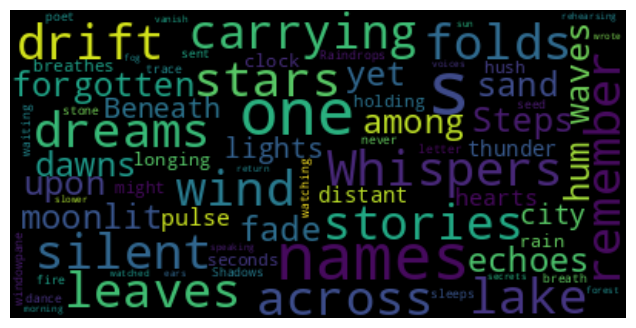

In [ ]:
#Loading the Dataset and Exploratory Data Analysis
# Reading the text data file
data = open('poems.txt', encoding="utf8").read()

# EDA: Generating WordCloud to visualize the text
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate(data)

# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

In [ ]:
# Generating the corpus by splitting the text into lines
corpus = data.lower().split("\n")
print(corpus[:10])

['whispers drift across the silent lake, where the stars remember our names.  ', 'the wind folds dreams into the leaves, carrying stories of forgotten dawns.  ', 'steps fade upon the moonlit sand, yet their echoes hum among the waves.  ', 'beneath the city lights, hearts pulse like distant thunder longing for rain.  ', 'the clock breathes between seconds, holding the hush of what might be.  ', 'raindrops trace the windowpane, each one a letter never sent.  ', 'a seed of fire sleeps in stone, waiting for the poet’s breath.  ', 'shadows dance when no one’s watching, rehearsing for the sun’s return.  ', 'the forest has no secrets, only voices speaking slower than our ears.  ', 'we wrote our names in fog, and watched them vanish into morning.  ']


In [ ]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)

Total Words: 95


In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [ ]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense((total_words+1)//2, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#model training
history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.0356 - loss: 5.2128
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0912 - loss: 5.1645
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0902 - loss: 5.1069
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0902 - loss: 5.0260
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0922 - loss: 4.9870
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0912 - loss: 4.9535
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0860 - loss: 4.8889
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0995 - loss: 4.7992
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0818 - loss: 4.8183
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1294 - loss: 4.7033
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1178 - loss: 4.6128
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1084 - lo

In [ ]:
#Accuracy and Loss
import math
print(f'The traning accuracy of model is {math.floor(history.history["accuracy"][-1] * 100)} %')
print(f'The traning loss of model is {history.history["loss"][-1]:.3f}')

The traning accuracy of model is 98 %
The traning loss of model is 0.682


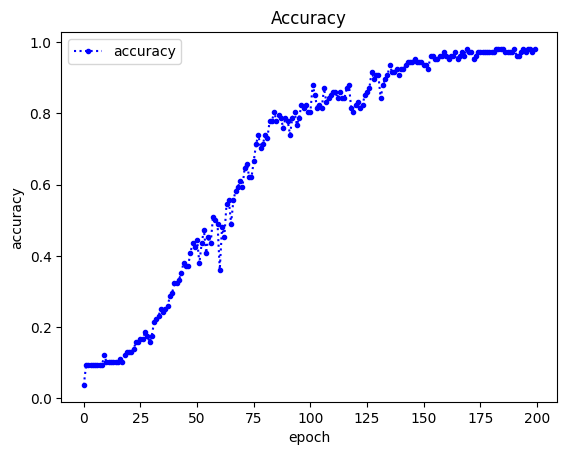

In [ ]:
#Accuracy

plt.title('Accuracy')
plt.plot(history.history['accuracy'], ".:", label='accuracy', linewidth=1.5, color="blue")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

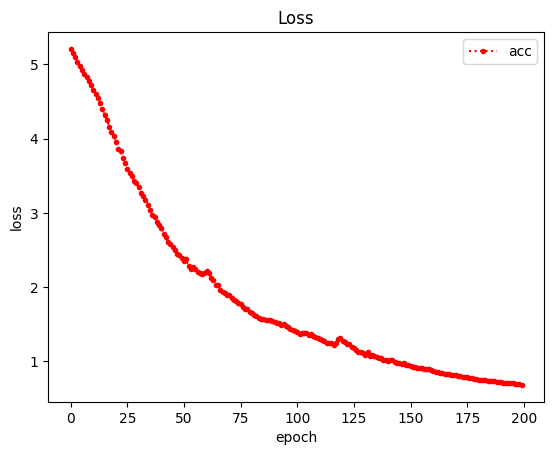

In [ ]:
#Loss
plt.title('Loss')
plt.plot(history.history['loss'], ".:", label='acc', linewidth=1.5, color="red")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
#Generating Text
seed_text = "world"
next_words = 20
ouptut_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

world fade trace the windowpane each one a letter never sent sent morning rain rain rain ears rain sent return forgotten
